<div style="text-align: center;">
    <h1 style="color: #3498db;">Artificial Intelligence & Machine Learning</h1>
    <h2 style="color: #3498db;">Overfitting vs Underfitting</h2>
</div>

-------------------------------------------------------------

<div style="background-color: #f2f2f2; padding: 10px; border-radius: 5px;">
    <b>Authors:</b> K. Said<br>
    <b>Date:</b> 08-09-2023
</div>

<div style="background-color: #e6e6e6; padding: 10px; border-radius: 5px; margin-top: 10px;">
    <p>This notebook is part of the "Artificial Intelligence & Machine Learning" lecture material. The following copyright statement applies to all contents and code within this file.</p>
    <b>Copyright statement:</b>
    <p>This material, no matter whether in printed or electronic form, may be used for personal and non-commercial educational use only. Any reproduction of this manuscript, no matter whether as a whole or in parts, no matter whether in printed or in electronic form, requires explicit prior acceptance of the authors and lecturers.</p>
</div>


<h1 style="color:rgb(0,120,170)">Introduction</h1>

-----------------------------------------------

<h2 style="color:rgb(0,120,0)">What you have learned so far</h2>

--------------------------------------------------------------------

In the last exercise we made a Train-Test-Split of our preprocessed Dataset, where we showed you 2 possible ways one could do this. Afterwards we trained a simple model and tried to increase the model accuracy by simply changing some parameters.


<h2 style="color:rgb(0,120,0)">Our Task</h2>

-------------------------------------------------
In this notebook, we will explore the concepts of overfitting and underfitting in machine learning. These concepts are crucial for understanding the balance between model complexity and generalization performance.
Instead of programming something, your new task should be to understand the general concept of Over-vs Underfitting, how it happens and how to interpret the results.

<h1 style="color:rgb(0,120,170)">Over- vs Underfitting: Some background information</h1>

-----------------------------------------------

<h2 style="color:orange">How to differentiate Overfitting and Underfitting?</h2>

--------------------------------------------------------------

Overfitting, Underfitting, Generalization Error, Bias-Variance-Tradeoff. We often hear about them, but what exactly are they and when does a model over- or underfit? While there is no absoulte answer to it because model fit assessment can depend on the specific problem and dataset, there are common signs and techniques to help identify each of these scenarios:

**Overfitting:** Overfitting often manifests as a significant gap between the training loss and validation loss. The training loss continues to decrease, but the validation loss starts to increase or plateaus. An example would be the image below:
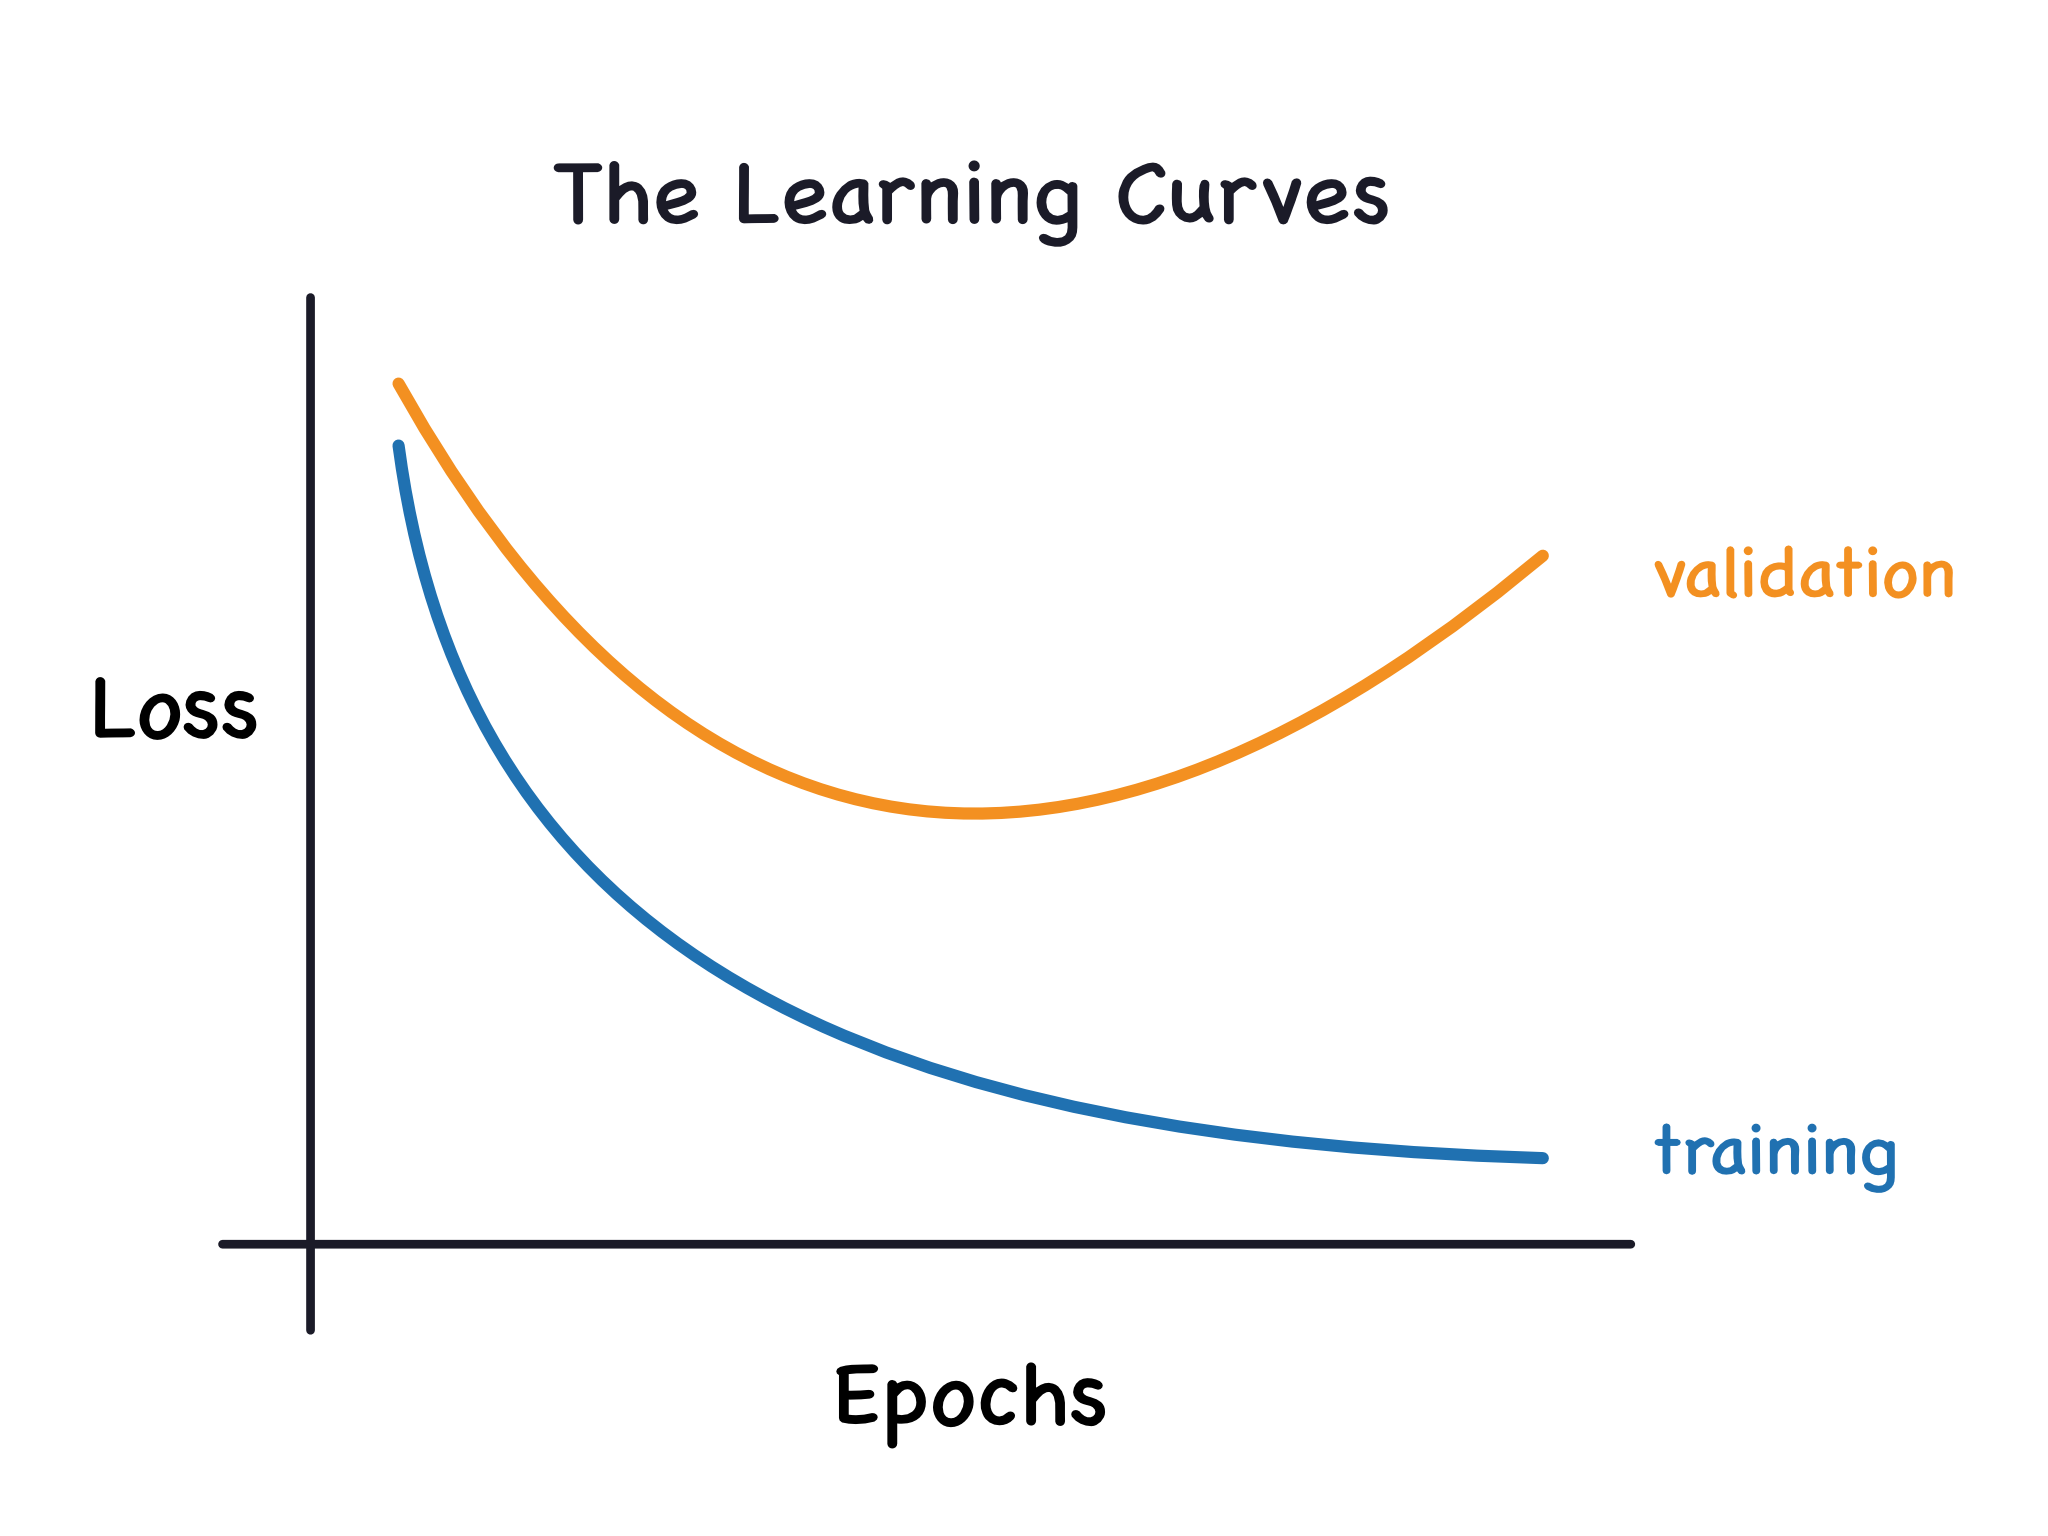

Here up to a specific epoch both, training and validation loss decrease. However, after some point, the model starts to overfit (it generalizes worse on future unseen data, in this case our validation data). Overfit models tend to capture noise in the training data rather than the underlying patterns (we say they have a higher variance). This results in a model that performs well on the training data but poorly on new, unseen data. Also overfitting is more likely to occur with complex models when the model has many parameters relative to the size of the dataset. 

**Underfitting:** In Underfitting instead the opposite is the case. Here the Training and the Validation Loss are both equally bad. Underfit models are too simple to represent the underlying relationships in the data, they simply have an insufficient complexity (we also say their bias is very high).


<h2 style="color:orange">Over-and Underfitting in context of Bias-Variance-Tradeoff</h2>

-----------------------------------------------------------------

To better understand the concept of Over-and Underfitting, we will now dive deeper into this topic by introducing you to the Bias-Variance-Tradeoff and use some mathematical concepts. (Sidenote: You do not have to know this by hard, but the mathematical notation will indeed give you a much better understanding). 

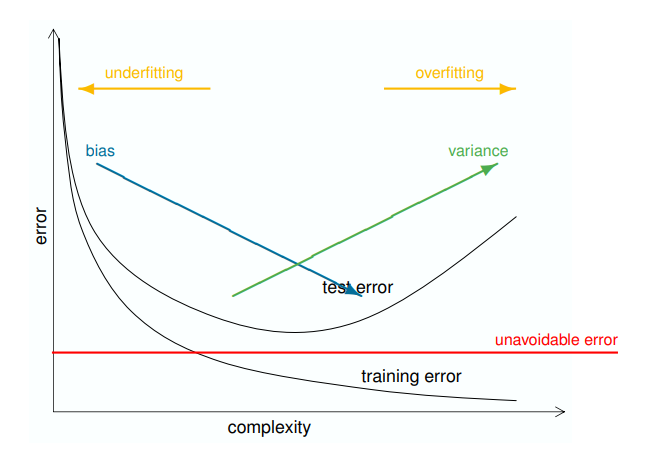


First of all, let us define some notations:
- **Task**: Our task is to estimate the true underlying parameters
- **Loss**: The difference between the estimated and true parameters. 
- **Evaluate Estimator**: Expected Prediction Error (EPE)
- **Training data X**: A nxm matrix, where columns are the features and rows are the individual samples

We define the EPE as:

$$EPE(x_0) = Var(y|x_0) + (E(y|x_0) - E_z (g(x_0;w_z)))^2 + E_{z1} (g(x_0;w_{z1}) - E_{z1} (g(x_0;w_z)))^2$$

- **The first term** of the equation is called the **unavoidable error**. It measures the amount to which the label y varies at $x_0$. To be more precise: It represents the inherent uncertainty or noise in the data that cannot be reduced no matter how complex or accurate the model is. Examples would be measurement errors or the inherent randomness of the data (e.g measuring amount of waterdroplets falling down from a waterfall per second)
- **The second term** is called **squared bias** and measures how close the model in average approximates the average target $y$ at $x_0$
- **The third term** is the **variance of the model** at $x_0$ and represents the variability of predictions when different models are trained on different subsets of the data.
- **g(x_0;w_z)** here is our model at input $x_0$, parameterized by the set of weights $w_z$


With this formula, it almost seems intuitively reasonable that with increasing complexity of the model class the bias decreases, while the variance ($E_{z1} (g(x_0;w_{z1}) - E_{z1} (g(x_0;w_z)))^2$) increases.

But why? In summary, decreasing bias by using a more complex model can lead to an increase in variance because the model starts fitting not just the true patterns but also the noise in the data. This increased sensitivity to noise results in greater variability in predictions when different subsets of the data are used, which is captured by the "Variance" term in the EPE formula.


<h1 style="color:rgb(0,120,170)">Over- vs Underfitting: Examples</h1>

-----------------------------------------------

Now that we are finally done with the dry theoretic part, let's look at some examples of Over- and Underfitting.

In [1]:
# Some import we need for our plots
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import ipywidgets as widgets

from IPython.display import display, Markdown, clear_output, Image
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge, LinearRegression
from sklearn.datasets import load_iris
from sklearn.neighbors import KNeighborsClassifier
from ipywidgets import interactive
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error
from sklearn.pipeline import Pipeline


from mod3_utils import load_example_1, load_example_2, load_example_3, load_quiz

<details>
<summary style="font-size: larger; color: white; background-color: rgba(255, 165, 0, 0.6); border: 1px solid grey; padding: 5px 15px; border-radius: 8px; cursor: pointer;">Model complexity vs Error 1</summary>

<div style="background-color: rgba(255, 204, 153, 0.6); padding: 10px; border-radius: 5px;">
    As you will see with below code, the error does not only depend on the dataset itself, but also on the model complexity.
</div>
</details>


In [2]:
# RUN CODE CELL
degree_slider = widgets.IntSlider(value=1, min=1, max=10, step=1, description='Degree:')
interactive_plot = interactive(load_example_1, degree=degree_slider)
interactive_plot

interactive(children=(IntSlider(value=1, description='Degree:', max=10, min=1), Output()), _dom_classes=('widg…

<div style="background-color: #f2f2f2; padding: 10px; border-radius: 5px;">
    As you play around with the slider and change the complexity of the model, also the error rate changes significantly. If you set the slider to 7 or more, the validation error will start to increase again. But keep in mind that while overfitting is a common cause of increasing validation error, other factors can lead to fluctuations or temporary increases in validation error as well.
</div>

<details>
<summary style="font-size: larger; color: white; background-color: rgba(255, 165, 0, 0.6); border: 1px solid grey; padding: 5px 15px; border-radius: 8px; cursor: pointer;">Model complexity vs Error 2</summary>

<div style="background-color: rgba(255, 204, 153, 0.6); padding: 10px; border-radius: 5px;">
    Below is another similar example. The left picture shows an underfitting model, while the right one shows an overfitting one.
</div>
</details>


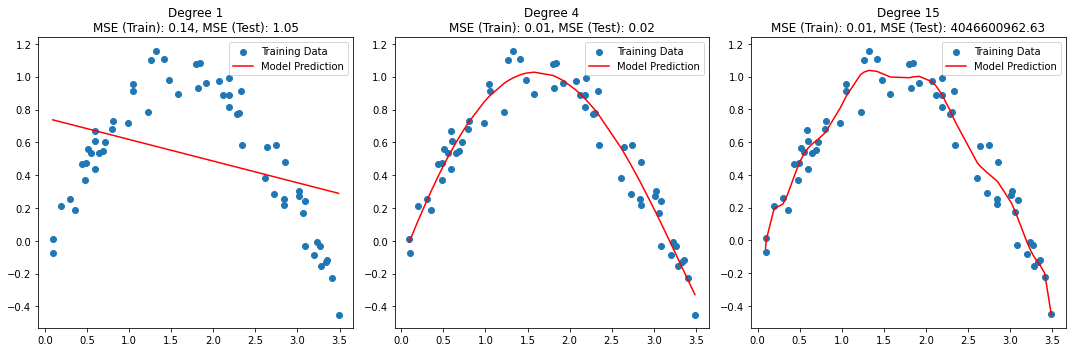

In [3]:
# RUN CODE CELL
load_example_2()

<details>
<summary style="font-size: larger; color: white; background-color: rgba(255, 165, 0, 0.6); border: 1px solid grey; padding: 5px 15px; border-radius: 8px; cursor: pointer;">K-NN: A fitting model</summary>

<div style="background-color: rgba(255, 204, 153, 0.6); padding: 10px; border-radius: 5px;">
    Now let's have a look at over and underfitting in the case of knn
</div>
</details>

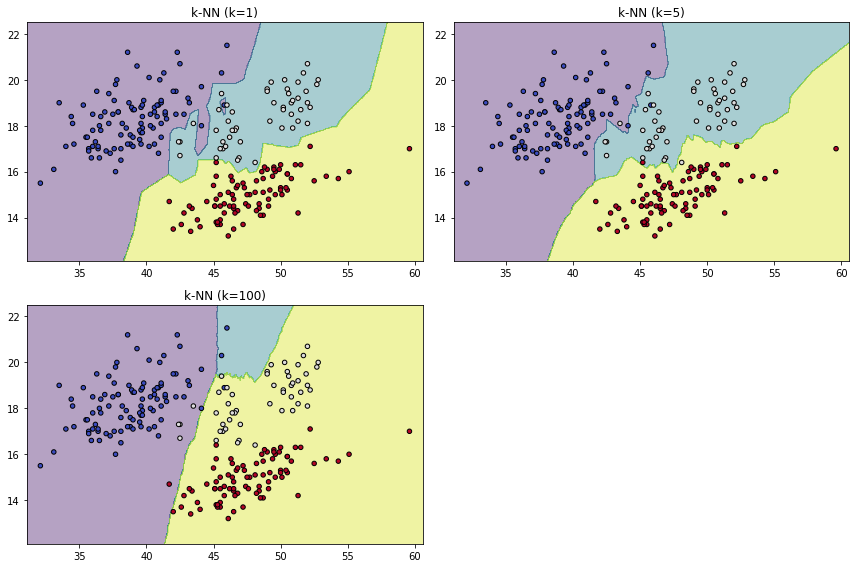

In [4]:
# RUN CODE CELL
load_example_3()

<div style="background-color: #f2f2f2; padding: 10px; border-radius: 5px;">
    By setting the hyperparameter k=1, we can clearly see that our model is overfitting. It fits to all points perfectly, even the outliers (smaller blue area). Setting k=100 instead gives us an underfitting model. The right image on the other hand shows a model that does a great job at separating all 3 classes, while not fitting to much to the noise of the data.

</div>

<h1 style="color:rgb(0,120,170)">Time to ask questions</h1>

-----------------------------------------------

At the end, we want you to do a short quiz to see wether you fully understood the topic of Overfitting and Underfitting. 

**Question 1:** What is the unavoidable error?

ToggleButtons(options=('It measures the amount to which the label y varies at  𝑥0', 'variance of the model at …

**Question 2:** Which of the two images shows overfitting?

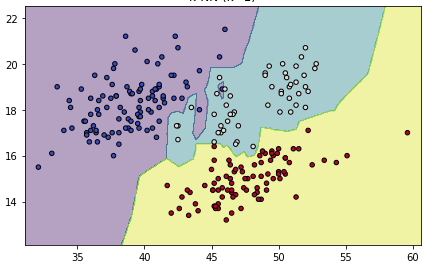

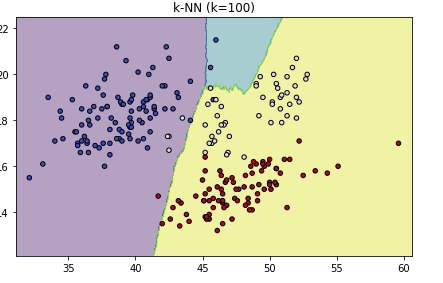

ToggleButtons(options=('Image 1', 'Image 2'), style=ToggleButtonsStyle(button_width='auto'), value='Image 1')

**Question 3:** Underfit models are too complex to represent the underlying relationships in the data

ToggleButtons(options=(True, False), style=ToggleButtonsStyle(button_width='auto'), value=True)

**Question 4:** What does the bias-variance tradeoff refer to in machine learning?

ToggleButtons(options=('Balancing the tradeoff between model size and computation time.', 'Balancing the trade…

**Question 5:** Overfitting occurs when a model:

ToggleButtons(options=('Has high bias', 'Fails to generalize to new, unseen data'), style=ToggleButtonsStyle(b…

**Question 6:** What is the primary purpose of a validation set when training a machine learning model?

ToggleButtons(options=('To provide additional training data to improve model accuracy.', "To test the model's …

**Question 7:** How does increasing the complexity of a machine learning model (e.g., adding more features or layers) typically affect the risk of overfitting?

ToggleButtons(options=(' It increases the risk of overfitting.', 'It has no impact on overfitting.', 'It makes…

Button(description='Submit Answers', style=ButtonStyle())

In [6]:
# RUN CODE CELL TO START QUIZ
load_quiz()